## HuggingFace Agents

In [ ]:
#!pip install -qU transformers diffusers accelerate openai

In [1]:
import os,sys
sys.path.insert(0,'../libs')
from utils import load_json

### Load all API keys 
keys = load_json('/home/chengyu.huang/project/Fund_projects/openai_key.json') 
os.environ['OPENAI_API_KEY'] = keys['ChatGPT']['API_KEY']

In [2]:
from transformers.tools import OpenAiAgent

agent = OpenAiAgent(
    model= 'gpt-3.5-turbo',
    api_key=os.environ['OPENAI_API_KEY']
)

/home/chengyu.huang/anaconda3/envs/sbert/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


==Explanation from the agent==
I will use the following tool: `image_generator` to generate an image according to the prompt.


==Code generated by the agent==
image = image_generator(prompt="A boat in the water")


==Result==


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 25/25 [00:01<00:00, 13.06it/s]


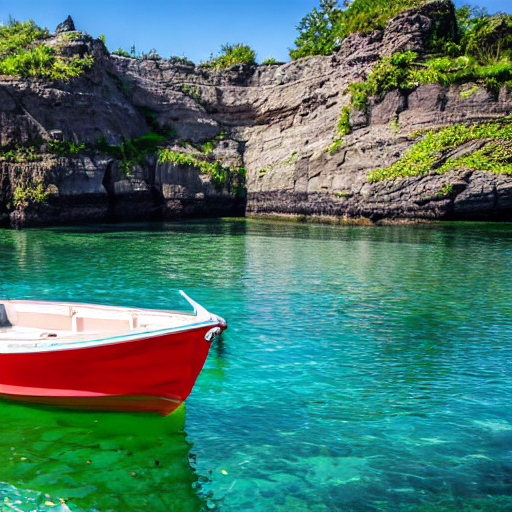

In [3]:
agent.run("generate an image of a boat in the water")

In [4]:
agent.toolbox

{'document_qa': PreTool(task='document-question-answering', description='This is a tool that answers a question about an document (pdf). It takes an input named `document` which should be the document containing the information, as well as a `question` that is the question about the document. It returns a text that contains the answer to the question.', repo_id=None),
 'image_captioner': PreTool(task='image-captioning', description='This is a tool that generates a description of an image. It takes an input named `image` which should be the image to caption, and returns a text that contains the description in English.', repo_id=None),
 'image_qa': PreTool(task='image-question-answering', description='This is a tool that answers a question about an image. It takes an input named `image` which should be the image containing the information, as well as a `question` which should be the question in English. It returns a text that is the answer to the question.', repo_id=None),
 'image_segmen

### now let's register a customized tool 

In [5]:
from transformers import Tool

class MeaningOfLifeTool(Tool):
    name = 'meaning_of_life_tool'
    description = (
        "This tool is used to find the answer to the meaning of life, the "
        "Universe and Everything. It takes the users 'query' and returns the "
        "answer they are looking for."
    )
    inputs = ['text']
    outputs = ['text']

    def __call__(self, query: str):
        return "42"

meaning_of_life_tool = MeaningOfLifeTool()

In [6]:
### now we cna make the tool available to agent 
agent = OpenAiAgent(
    model='gpt-3.5-turbo',
    api_key=os.environ['OPENAI_API_KEY'],
    additional_tools=[meaning_of_life_tool]
)

In [7]:
## now run a task 
agent.run("what is the meaning of life?")

==Explanation from the agent==
I will use the following tool: `meaning_of_life_tool` to find the answer to the question.


==Code generated by the agent==
answer = meaning_of_life_tool(query="What is the meaning of life?")
print(f"The answer is {answer}.")


==Result==
The answer is 42.


'42'

### Take a look at the prompt template 

In [1]:
print(agent.run_prompt_template)

NameError: name 'agent' is not defined